In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Gradient of sigmoid function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Logistic regression using batch gradient descent
def logistic_regression(X, y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []
    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, weights) + bias)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)
        d_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y) * sigmoid_gradient(y_pred))
        d_bias = (1 / n_samples) * np.sum((y_pred - y) * sigmoid_gradient(y_pred))
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss={loss}")
    return weights, bias

# Given data
X = np.array([[3], [5], [8], [1]])
y = np.array([0, 1, 1, 0])

# Train logistic regression model
weights, bias = logistic_regression(X, y, learning_rate=0.01, epochs=100)

# Predict for a new student
hours_studied = 6
X_new = np.array([[hours_studied]])
y_pred = sigmoid(np.dot(X_new, weights) + bias)
print(f"Predicted probability of passing: {y_pred[0]}")
if y_pred >= 0.5:
    print("Prediction: Pass")
else:
    print("Prediction: Fail")

Epoch 0: Loss=0.25
Epoch 10: Loss=0.23712326854689492
Epoch 20: Loss=0.22774849607069475
Epoch 30: Loss=0.22093119451300441
Epoch 40: Loss=0.21594770139446373
Epoch 50: Loss=0.21227102952245203
Epoch 60: Loss=0.2095260824111025
Epoch 70: Loss=0.2074479882516967
Epoch 80: Loss=0.20584968799485764
Epoch 90: Loss=0.20459849633700045
Predicted probability of passing: 0.694406147496735
Prediction: Pass


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
# Separate features and labels
X = df.drop(labels=["Purchased"], axis=1)
y = df["Purchased"]

In [ ]:
# Feaure scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [ ]:
# Training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction
y_pred = lr.predict(X_test)


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8625

		Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.90      0.67      0.77        27

    accuracy                           0.86        80
   macro avg       0.88      0.81      0.83        80
weighted avg       0.87      0.86      0.86        80



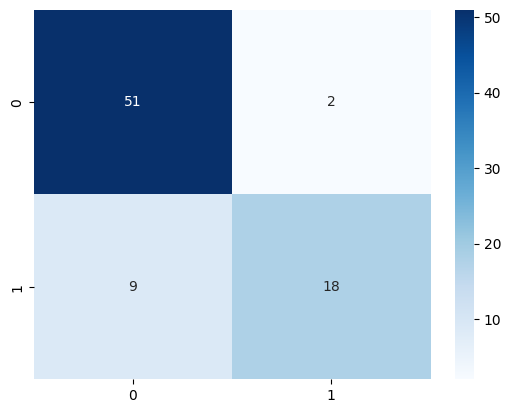

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

ROC AUC Score: 0.8144654088050314


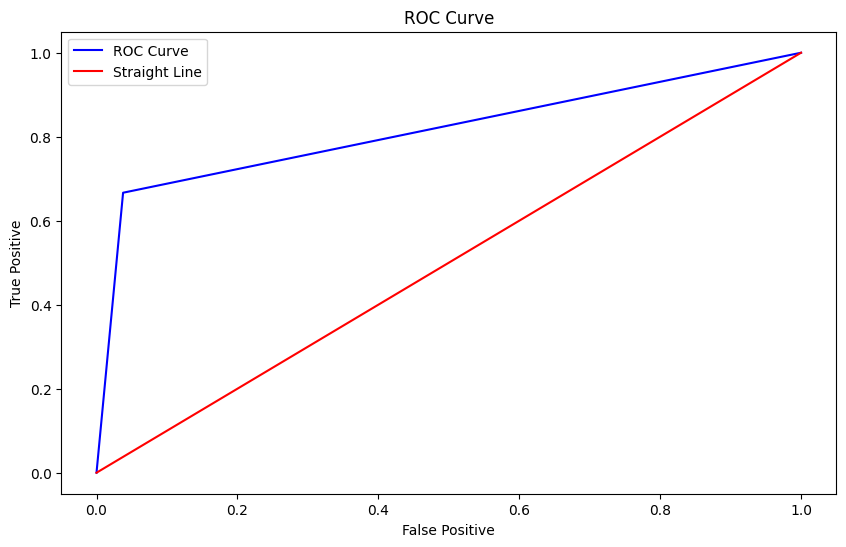

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Batch Gradient Descent

In [ ]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient Descent
def batch_gradient_descent(X, y, epochs=20, lr=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta -= lr*gradient
        loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, theta)
y_pred_batch = [int(i) for i in y_pred_batch]


Loss afer epoch 1: 0.6931471805599453
Loss afer epoch 2: 0.6885290023192263
Loss afer epoch 3: 0.6839691447893248
Loss afer epoch 4: 0.6794675784399741
Loss afer epoch 5: 0.6750242541161233
Loss afer epoch 6: 0.6706391031307144
Loss afer epoch 7: 0.6663120373939423
Loss afer epoch 8: 0.6620429495783802
Loss afer epoch 9: 0.6578317133191841
Loss afer epoch 10: 0.6536781834484285
Loss afer epoch 11: 0.6495821962624773
Loss afer epoch 12: 0.6455435698211501
Loss afer epoch 13: 0.6415621042773152
Loss afer epoch 14: 0.6376375822354184
Loss afer epoch 15: 0.633769769137358
Loss afer epoch 16: 0.6299584136740123
Loss afer epoch 17: 0.6262032482206605
Loss afer epoch 18: 0.6225039892944594
Loss afer epoch 19: 0.6188603380320974
Loss afer epoch 20: 0.6152719806857028


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_batch)}")

Accuracy: 0.7875

		Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        53
           1       0.66      0.78      0.71        27

    accuracy                           0.79        80
   macro avg       0.77      0.79      0.77        80
weighted avg       0.80      0.79      0.79        80



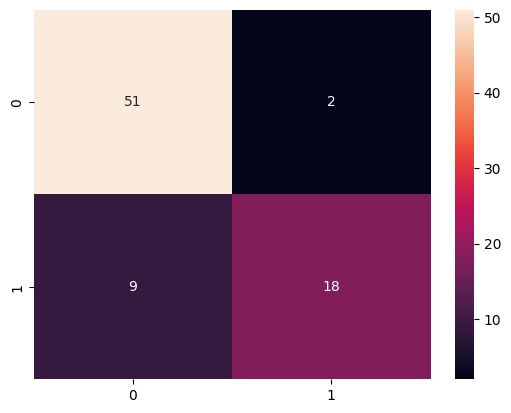

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

ROC AUC Score: 0.7851153039832285


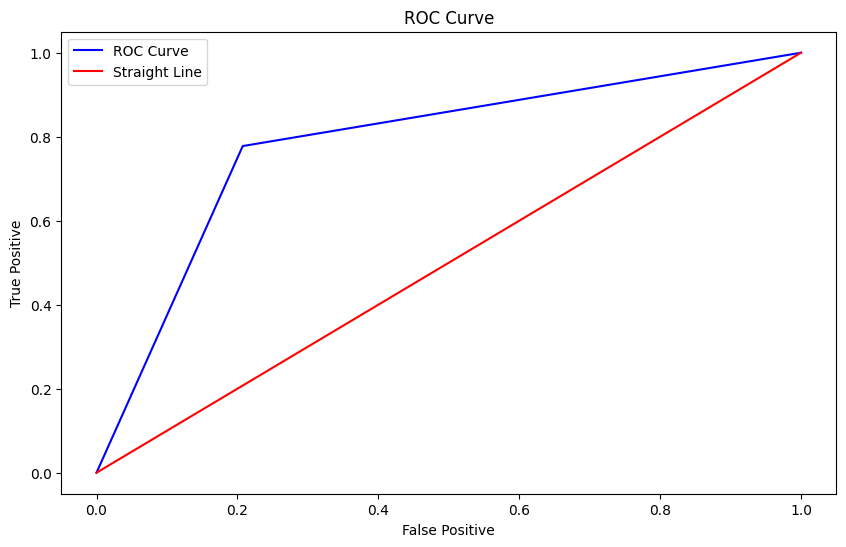

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_batch)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
y_train = y_train.values

# SGD

In [ ]:
def stochastic_gradient_descent(X, y, epochs=20, lr=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss = 0
        for i in range(m):
            Xi = X[i]
            yi = y[i]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/m}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = stochastic_gradient_descent(X_train, y_train.values, epochs=20, lr=0.01)
y_pred_sgd = predict(X_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]

Loss after epoch 1: 0.5855147922491593
Loss after epoch 2: 0.4933238332197815
Loss after epoch 3: 0.46447211751097417
Loss after epoch 4: 0.45191818193854544
Loss after epoch 5: 0.4454848723352474
Loss after epoch 6: 0.4418615317421728
Loss after epoch 7: 0.43969279529092953
Loss after epoch 8: 0.4383388515102995
Loss after epoch 9: 0.4374672290976161
Loss after epoch 10: 0.43689290199473474
Loss after epoch 11: 0.43650751864703985
Loss after epoch 12: 0.4362451070587937
Loss after epoch 13: 0.4360642560400397
Loss after epoch 14: 0.43593833327846443
Loss after epoch 15: 0.4358498721872944
Loss after epoch 16: 0.43578723232567873
Loss after epoch 17: 0.43574255232643144
Loss after epoch 18: 0.4357104635668126
Loss after epoch 19: 0.43568726490389736
Loss after epoch 20: 0.43567038387674345


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_sgd)}")

Accuracy: 0.8

		Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        53
           1       0.64      0.93      0.76        27

    accuracy                           0.80        80
   macro avg       0.80      0.83      0.79        80
weighted avg       0.85      0.80      0.81        80



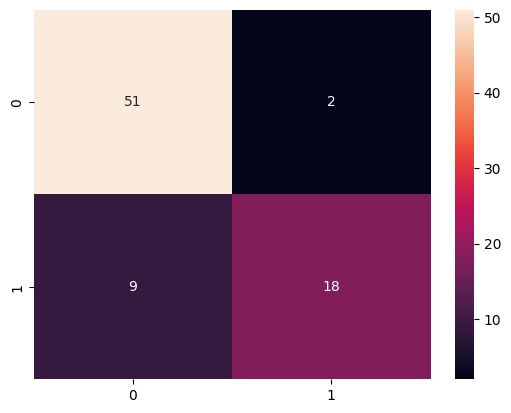

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

ROC AUC Score: 0.8308874912648498


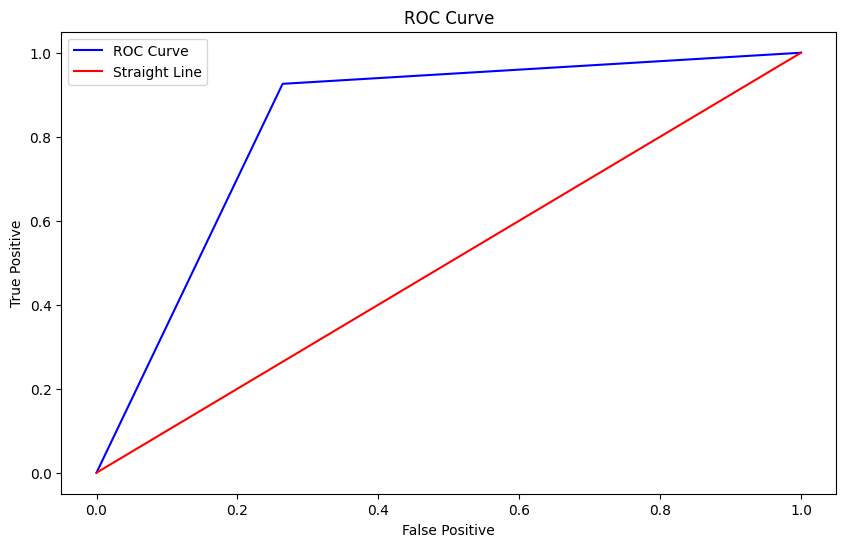

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_sgd)

# AUC Score
auc = roc_auc_score(y_test, y_pred_sgd)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Mini Batch Gradient Descent


In [ ]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient Descent
def mini_batch_gradient_descent(X, y, epochs=20, lr=0.01, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss=0
        for batch in range(1,(X.shape[0]//batch_size)+1):
            Xi = X[batch_size*(batch-1):batch_size*batch, :]
            yi = y[batch_size*(batch-1):batch_size*batch]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))//m
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss/10}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, theta)
y_pred_mini_batch = [int(i) for i in y_pred_mini_batch]


Loss afer epoch 1: 0.6723955654262579
Loss afer epoch 2: 0.6316024631018669
Loss afer epoch 3: 0.5970377672293702
Loss afer epoch 4: 0.5682700020327183
Loss afer epoch 5: 0.5439323725571937
Loss afer epoch 6: 0.5232269729527395
Loss afer epoch 7: 0.5057850970512592
Loss afer epoch 8: 0.49135565500439515
Loss afer epoch 9: 0.47946830857733397
Loss afer epoch 10: 0.4697308085987072
Loss afer epoch 11: 0.461714525675188
Loss afer epoch 12: 0.4552092711394301
Loss afer epoch 13: 0.4500411502474674
Loss afer epoch 14: 0.4457792743024628
Loss afer epoch 15: 0.44290577697244427
Loss afer epoch 16: 0.44075744632573527
Loss afer epoch 17: 0.4391952879932518
Loss afer epoch 18: 0.43840011284068847
Loss afer epoch 19: 0.43790257752210116
Loss afer epoch 20: 0.43771706705039676


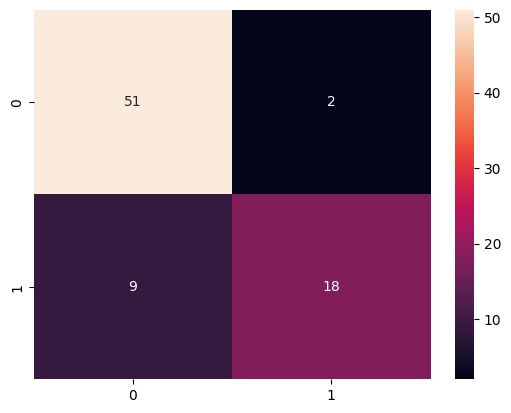

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_mini_batch)}\n")
print(f"Precision: {precision_score(y_test, y_pred_mini_batch)}\n")
print(f"Recall: {recall_score(y_test, y_pred_mini_batch)}\n")
print(f"F1-score: {f1_score(y_test, y_pred_mini_batch)}\n")

Accuracy: 0.8375

Precision: 0.6944444444444444

Recall: 0.9259259259259259

F1-score: 0.7936507936507936



ROC AUC Score: 0.8478701825557808


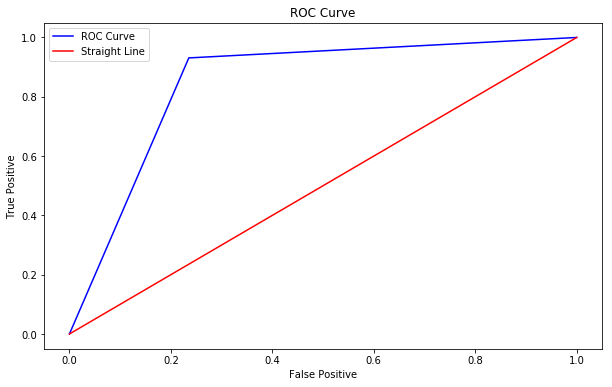

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_mini_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_mini_batch)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()